In [1]:
import sys 
sys.path.append('./../src')

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period, obv, rsi_over_period
from lib.charts import chart

In [2]:
ticker = 'F'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-17 21:00:00,2020-09-17 21:00:00,7.31,7.3100,7.3500,7.360,310143
2020-09-18 21:00:00,2020-09-18 21:00:00,7.21,7.2300,7.2200,7.230,23682
2020-09-21 21:00:00,2020-09-21 21:00:00,6.86,6.8700,6.8700,6.880,61213
2020-09-22 21:00:00,2020-09-22 21:00:00,6.77,6.7798,6.7900,6.790,56943
2020-09-23 21:00:00,2020-09-23 21:00:00,6.62,6.6500,6.6300,6.650,58933
...,...,...,...,...,...,...
2021-03-12 21:00:00,2021-03-12 21:00:00,13.34,13.3500,13.3401,13.375,602378
2021-03-13 00:00:00,2021-03-13 00:00:00,13.32,13.3600,13.3700,13.370,44896
2021-03-15 13:00:00,2021-03-15 13:00:00,13.08,13.4200,13.2300,13.620,15455132


In [3]:
rsi_data = list(zip(data['c'], data['o']))
rsis = rsi_over_period(rsi_data)

[(8.87, 8.86), (8.78, 8.76), (8.55, 8.53), (8.71, 8.67), (8.86, 8.85), (9.08, 9.05), (9.0, 8.98), (9.28, 9.23), (9.9, 9.81), (9.77, 9.75), (10.2, 10.18), (9.85, 9.82), (10.3, 10.02), (10.99, 10.88), (11.53, 11.26), (11.52, 11.47), (11.24, 11.19), (11.18, 11.14), (10.74, 10.6), (10.75, 10.73), (10.55, 10.5), (11.1, 10.875), (11.0, 10.9), (11.4, 11.25), (11.75, 11.3), (11.53, 11.51), (11.56, 11.51), (11.94, 11.925), (11.75, 11.58), (11.46, 11.43), (11.47, 11.42), (11.54, 11.51), (11.48, 11.47), (11.42, 11.4), (11.56, 11.54), (11.75, 11.72), (11.75, 11.57), (12.25, 12.15), (11.77, 11.72), (11.72, 11.68), (11.99, 11.96), (12.6, 12.53), (12.26, 12.2), (11.98, 11.9), (12.3, 12.11), (12.75, 12.7), (12.61, 12.58), (12.91, 12.9), (13.04, 12.96), (12.82, 12.78), (12.85, 12.81), (12.99, 12.73), (13.375, 13.34), (13.37, 13.32), (13.62, 13.08), (13.22, 13.16)]
[(8.83, 8.82), (8.87, 8.86), (8.78, 8.76), (8.55, 8.53), (8.71, 8.67), (8.86, 8.85), (9.08, 9.05), (9.0, 8.98), (9.28, 9.23), (9.9, 9.81), (

In [4]:
returns = []
for i in range(0, len(data)):
    if i == 0:
        returns = returns + [0]
    else:
        returns = returns + [(data.iloc[i]['c'] - data.iloc[i-1]['c'])/data.iloc[i-1]['c']]
data['r'] = returns

In [5]:
obvs = obv(data)

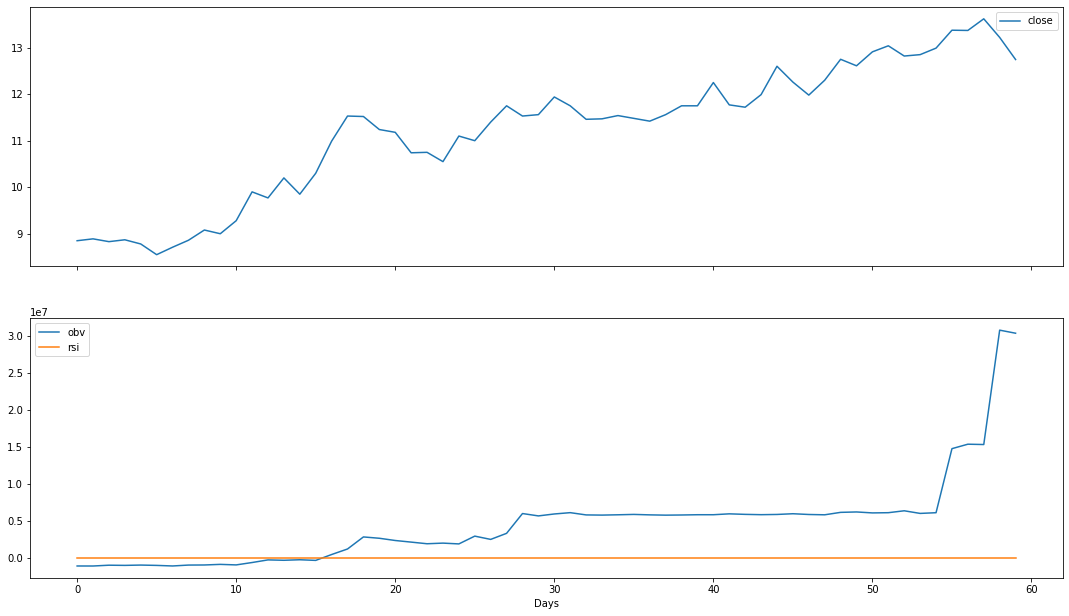

In [7]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)
stochastic_vals = stochastic_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

obv_data = obvs[-1-days:-1]

rsi_data = rsis[-1-days:-1]

oscillator_dicts = [
    # { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    # { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    # { 'chart': 'bar', 'data': histo, 'label': ''},
    # { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    # { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'},
    # { 'chart': 'line', 'data': obv_data, 'label': 'obv'},
    { 'chart': 'line', 'data': rsi_data, 'label': 'rsi'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)